# Describing Distributions
- Michael Vincent
- 9/24

## Imports

In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load the data

In [5]:
# Load the data
df = pd.read_csv('data/medical_data.csv')
df.head()

,Unnamed: 0,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


## Helper function

In [32]:
def make_hist(feature):
    """Function to plot a histogram with some descriptive statistics for the
    given feature."""
    
    # Get the statistics
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    
    # Get the values one standard deviation from the mean
    std_plus_one = mean + std
    std_minus_one = mean - std
    
    # Construct the plot
    fig, ax = plt.subplots(figsize = (13, 8));
    sns.histplot(feature, ax = ax, stat = 'probability', kde = True)
    ax.axvline(mean, color = 'red', label = 'Mean')
    ax.axvline(median, color = 'green', ls = '--', label = 'Median')
    ax.axvline(std_minus_one, color = 'black', label = '-1 std')
    ax.axvline(std_plus_one, color = 'black', label = '+1 std')
    ax.axvspan(std_minus_one, std_plus_one, color = 'yellow', zorder = 0)
    ax.legend()

## Vitamin D levels

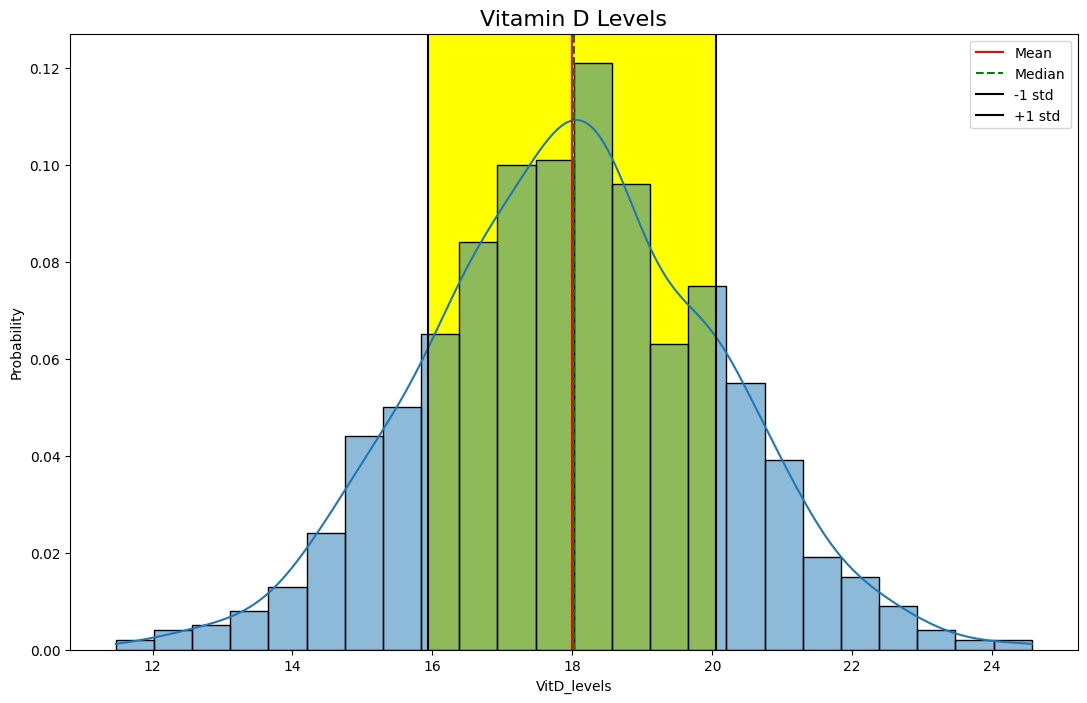

In [40]:
# Plot the histogram for the vitamin D levels
make_hist(df['VitD_levels'])
# Add the title
plt.title('Vitamin D Levels', fontsize = 16);

In [42]:
# Get the kurtosis
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

1. Vitamin D levels are a continuous variable.
2. Since the median is close to the mean, and the histogram is fairly symmetric, we would say this distribution does not have a skew.
3. The kurtosis value is approximately 3, so this distribution is mesokurtic.

## Doctor visits

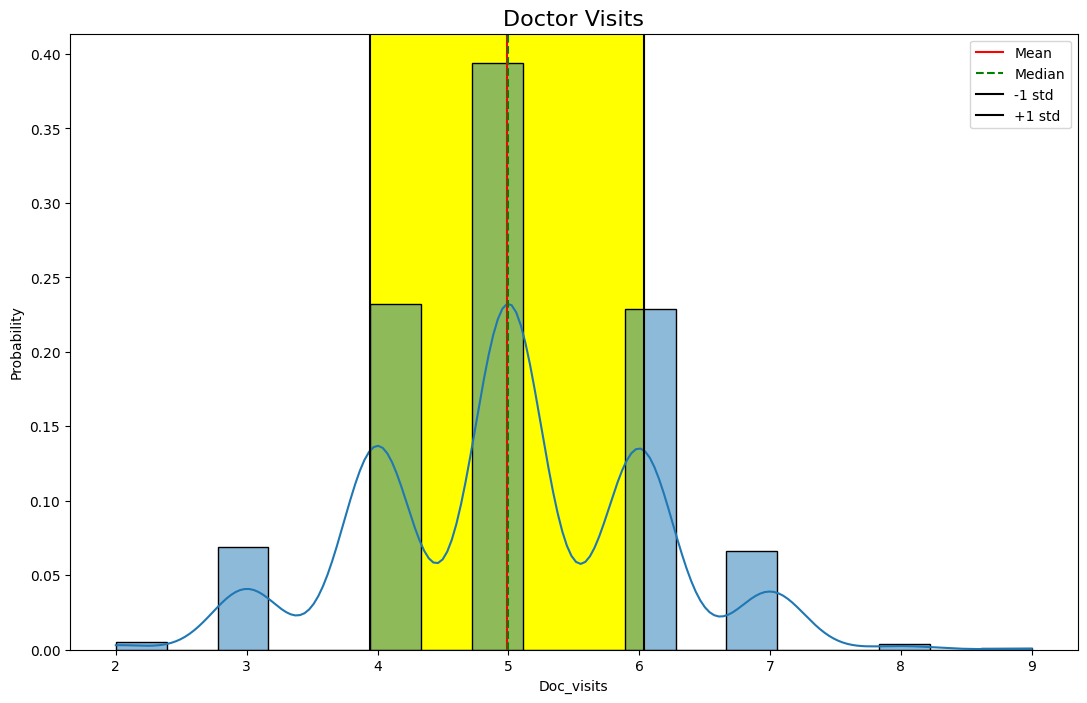

In [49]:
# Plot the histogram
make_hist(df['Doc_visits'])
# Add the title
plt.title('Doctor Visits', fontsize = 16);

In [46]:
# Get the kurtosis
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

1. Doctor visits is a discrete variable
2. The proximity of the median and mean along with the symmetric histogram suggest this distribution is symmetric.
3. The kurtosis value is approximately 3 so this distribution is mesokurtic.

## Total Charge

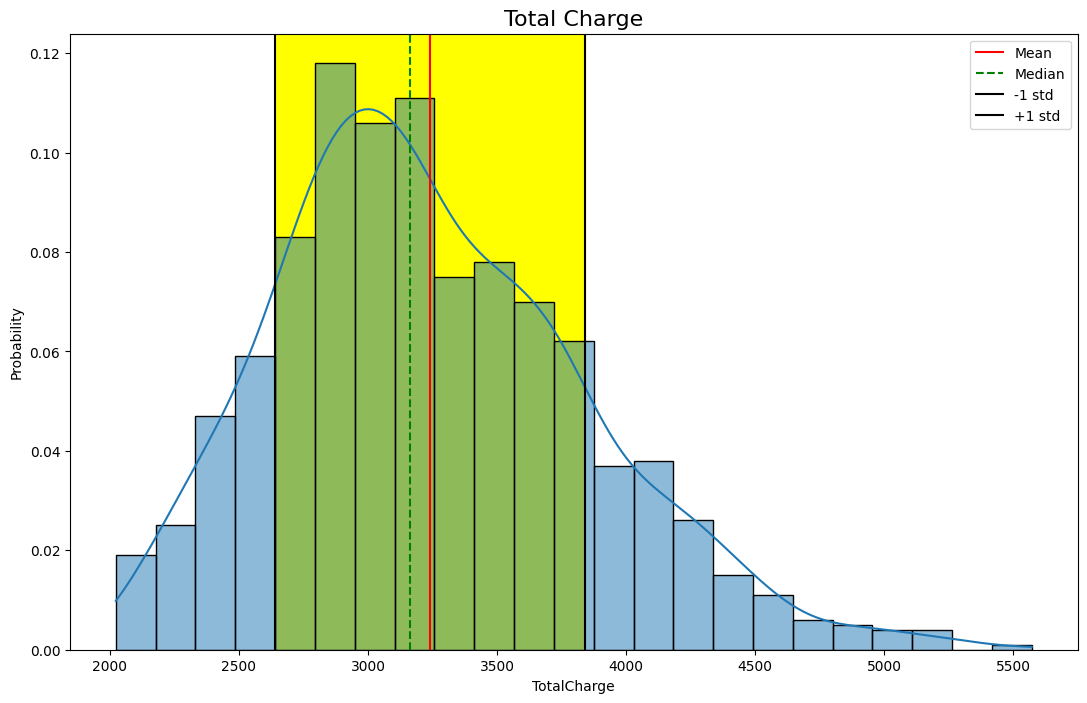

In [50]:
# Plot the histogram
make_hist(df['TotalCharge'])
# Add the title
plt.title('Total Charge', fontsize = 16);

In [51]:
# Get the kurtosis
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384

1. Total Charge is a continuous variable.
2. The mean is greater than the median, and histogram shows more values farther from the mean, so we would say this distribution is right skewed.
3. The kurtosis is about 3.33. It's far enough from 3 that we would say this distribution is leptokurtic.